   COMPREHENSIVE PUBLICATION-READY ANALYSIS FOR PSO-BAT ALGORITHMS

[STEP 1/6] Running optimization experiments (30 runs × 4 algorithms × 12 functions)
--------------------------------------------------------------------------------

Sphere
  Classic PSO... Mean: 5.322573
  Classic BAT... Mean: 1.271581
  Attention PSO-BAT... Mean: 0.027900
  Dynamic PSO-BAT... Mean: 0.025891

Rastrigin
  Classic PSO... Mean: 128.374196
  Classic BAT... Mean: 359.580154
  Attention PSO-BAT... Mean: 156.651996
  Dynamic PSO-BAT... Mean: 171.063850

Ackley
  Classic PSO... Mean: 9.789169
  Classic BAT... Mean: 19.196077
  Attention PSO-BAT... Mean: 5.979193
  Dynamic PSO-BAT... Mean: 5.968018

Rosenbrock
  Classic PSO... Mean: 18489.542433
  Classic BAT... Mean: 686.581200
  Attention PSO-BAT... Mean: 135.155327
  Dynamic PSO-BAT... Mean: 135.596899

Griewank
  Classic PSO... Mean: 16.182309
  Classic BAT... Mean: 301.585332
  Attention PSO-BAT... Mean: 5.096919
  Dynamic PSO-BAT... Mean: 4.491727

Schwe

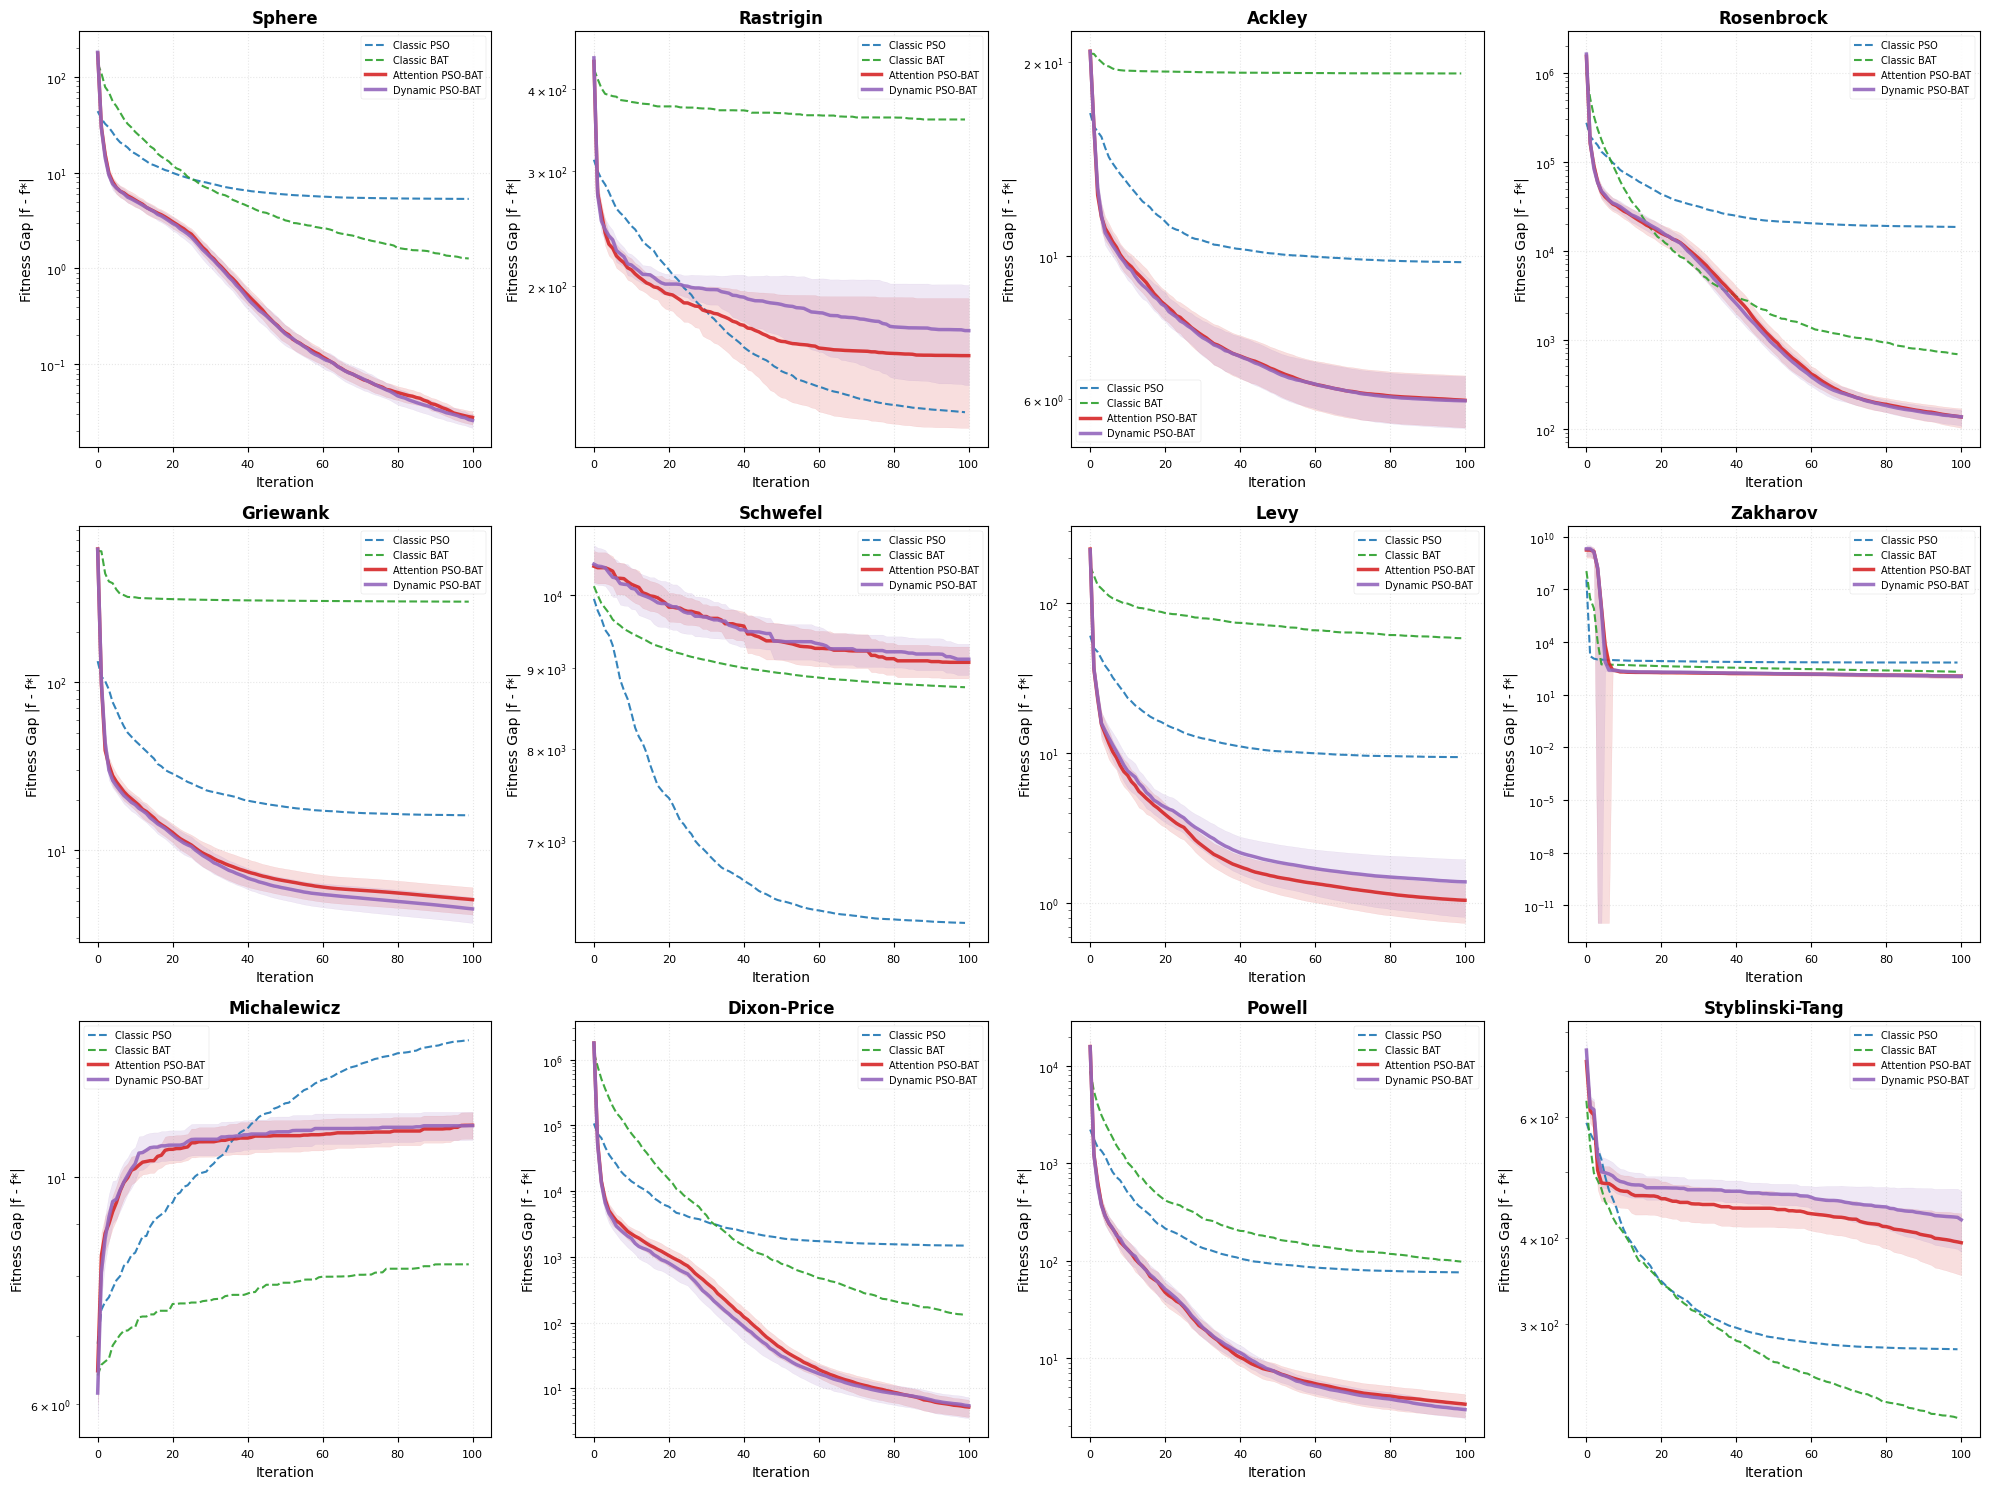

✓ Saved: convergence_curves.png
  → Box plots...


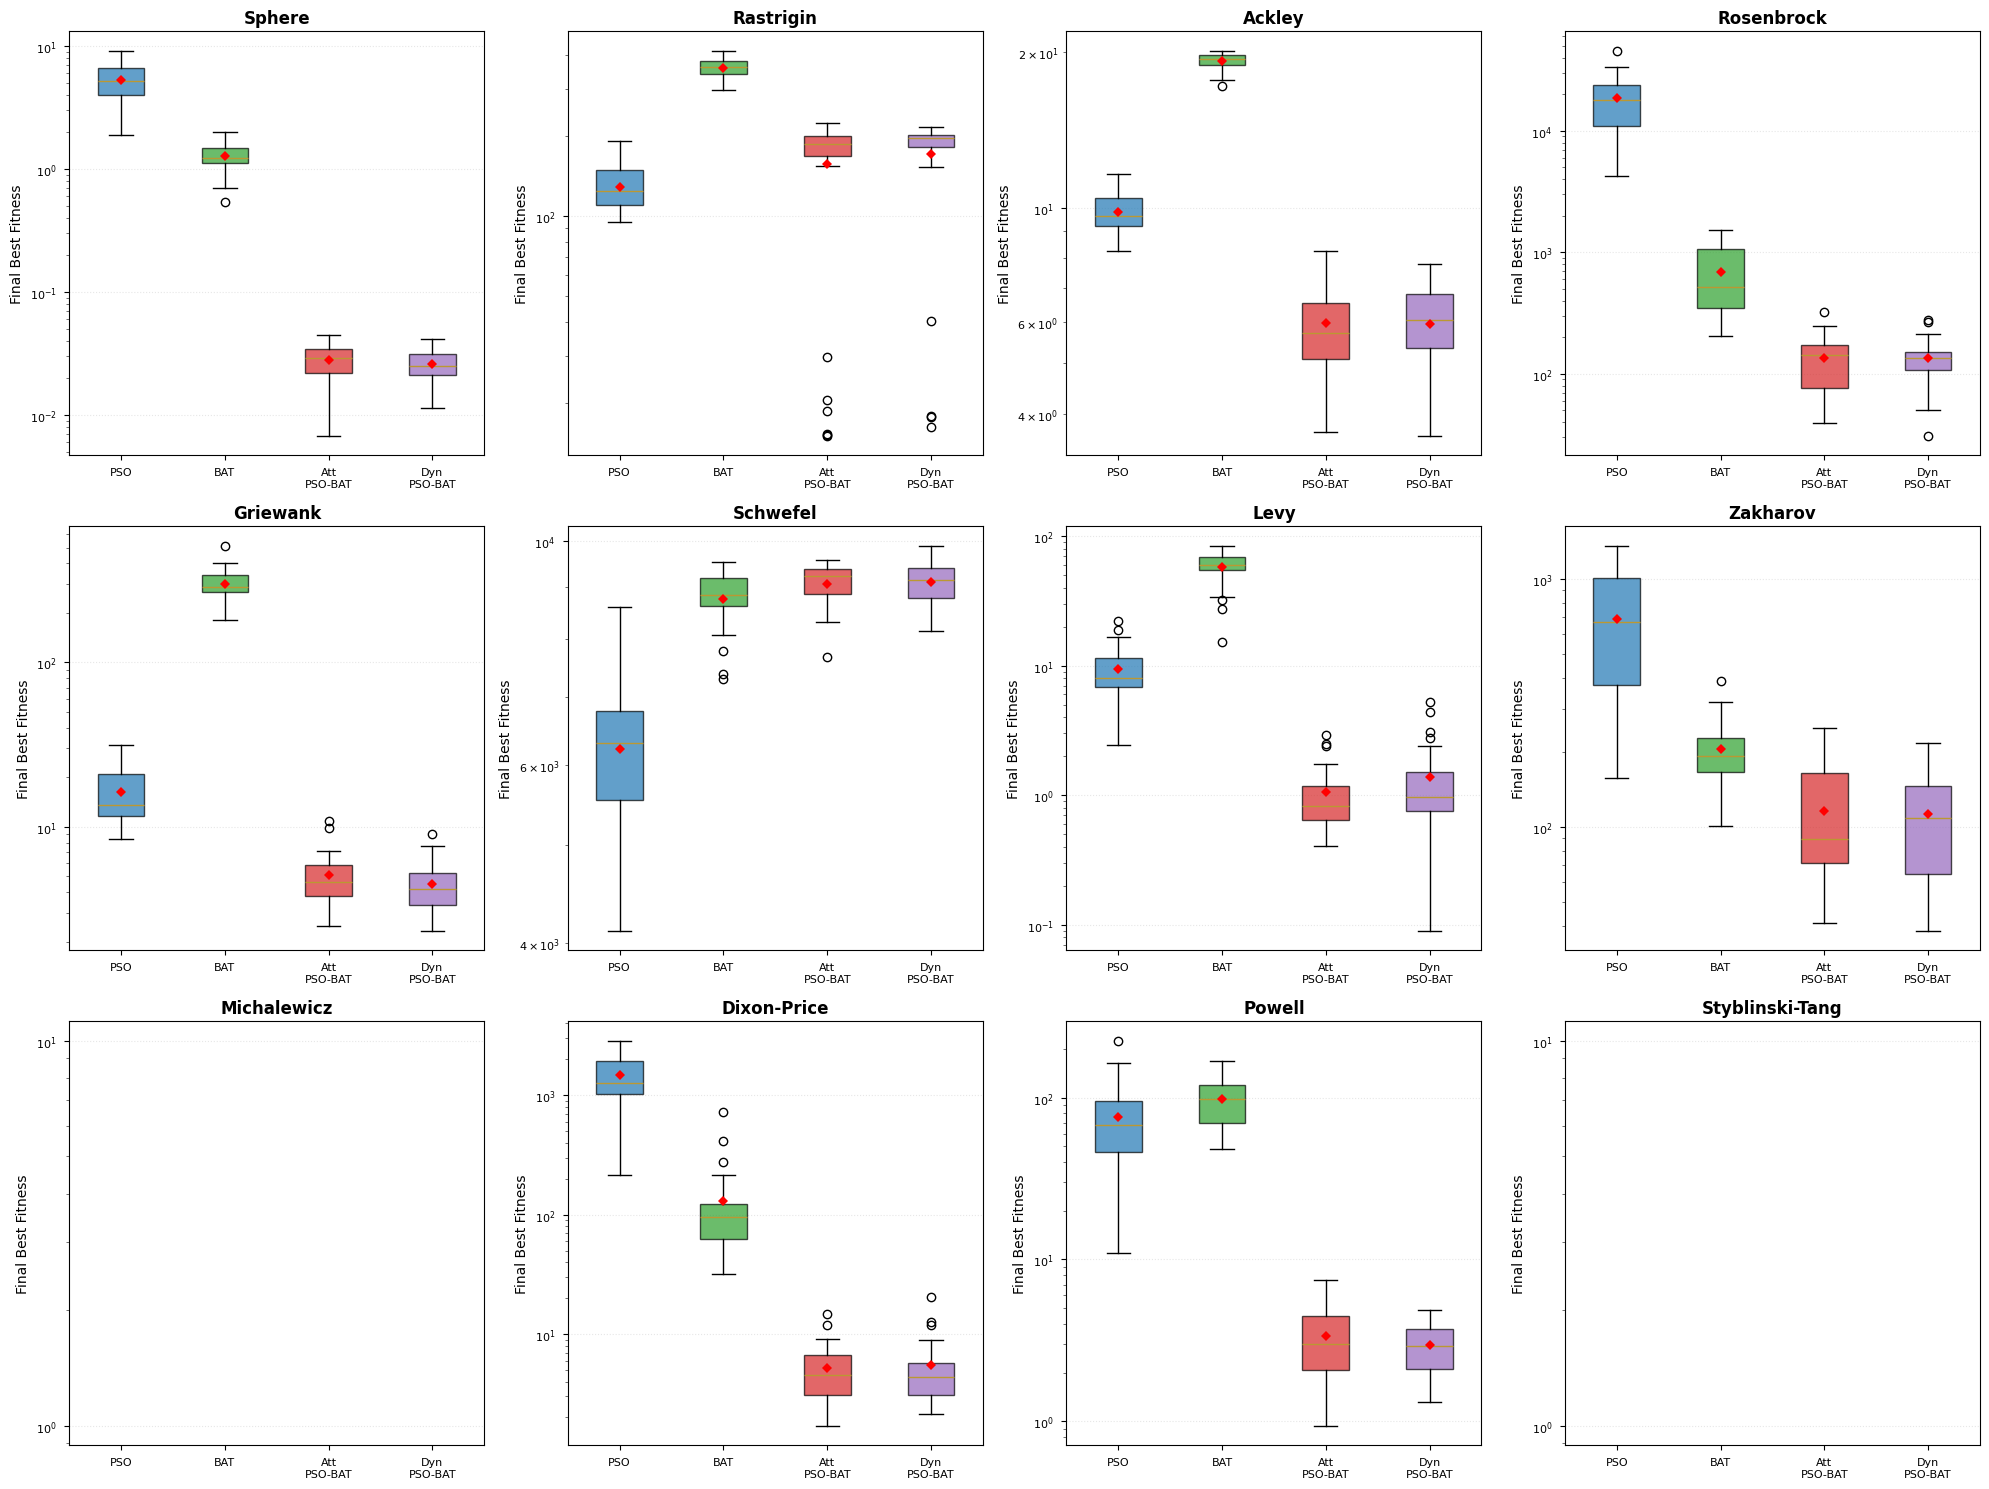

✓ Saved: boxplots.png
  → Performance profile...


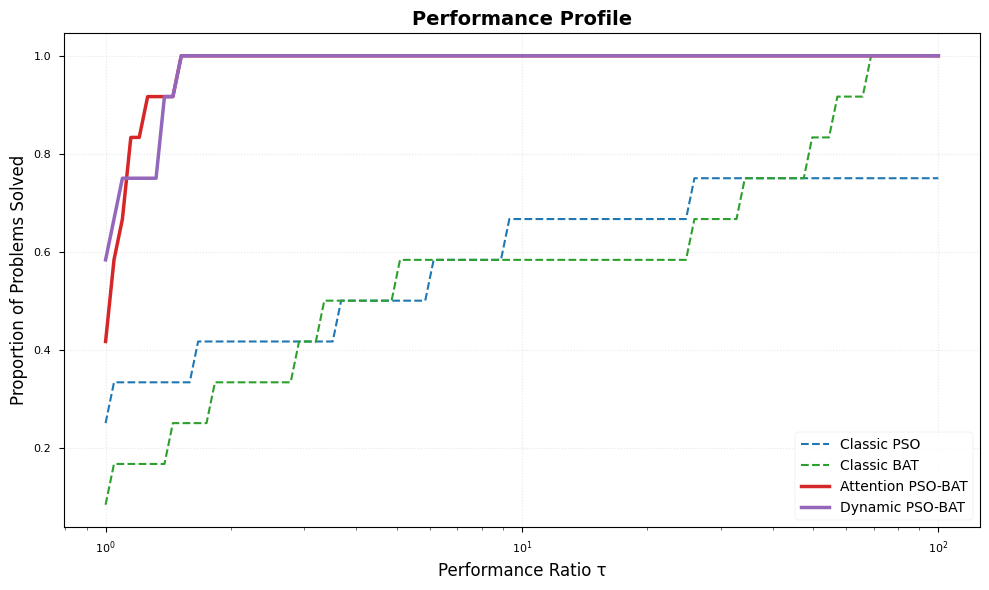

✓ Saved: performance_profile.png
  → Heatmap comparison...


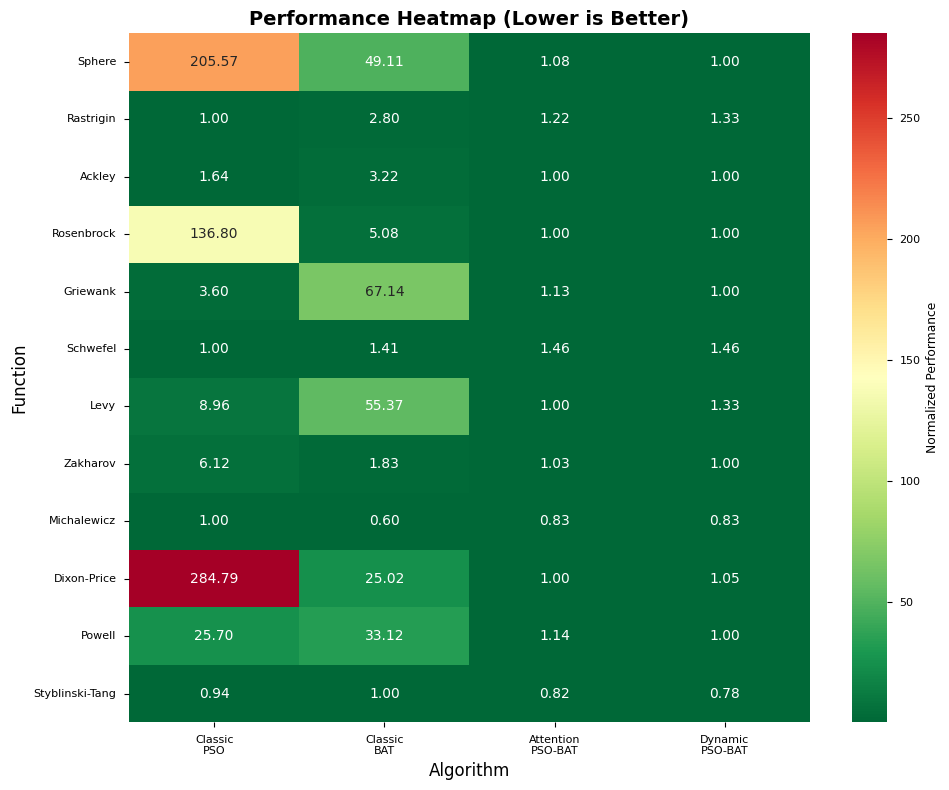

✓ Saved: heatmap_comparison.png
  → Ranking analysis...


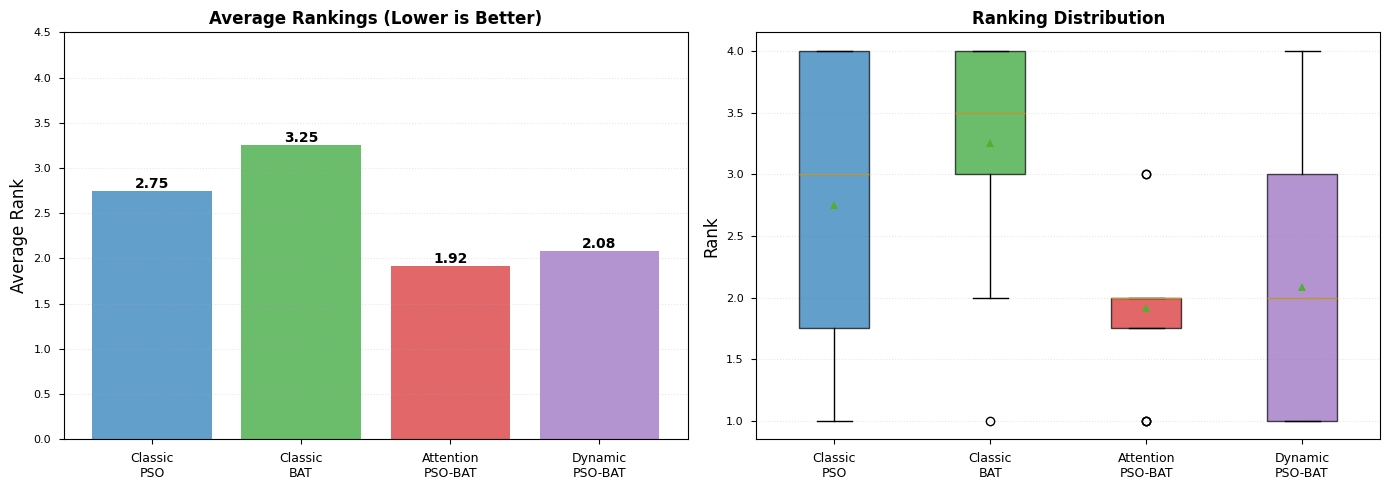

✓ Saved: ranking_analysis.png
  → Statistical summary...


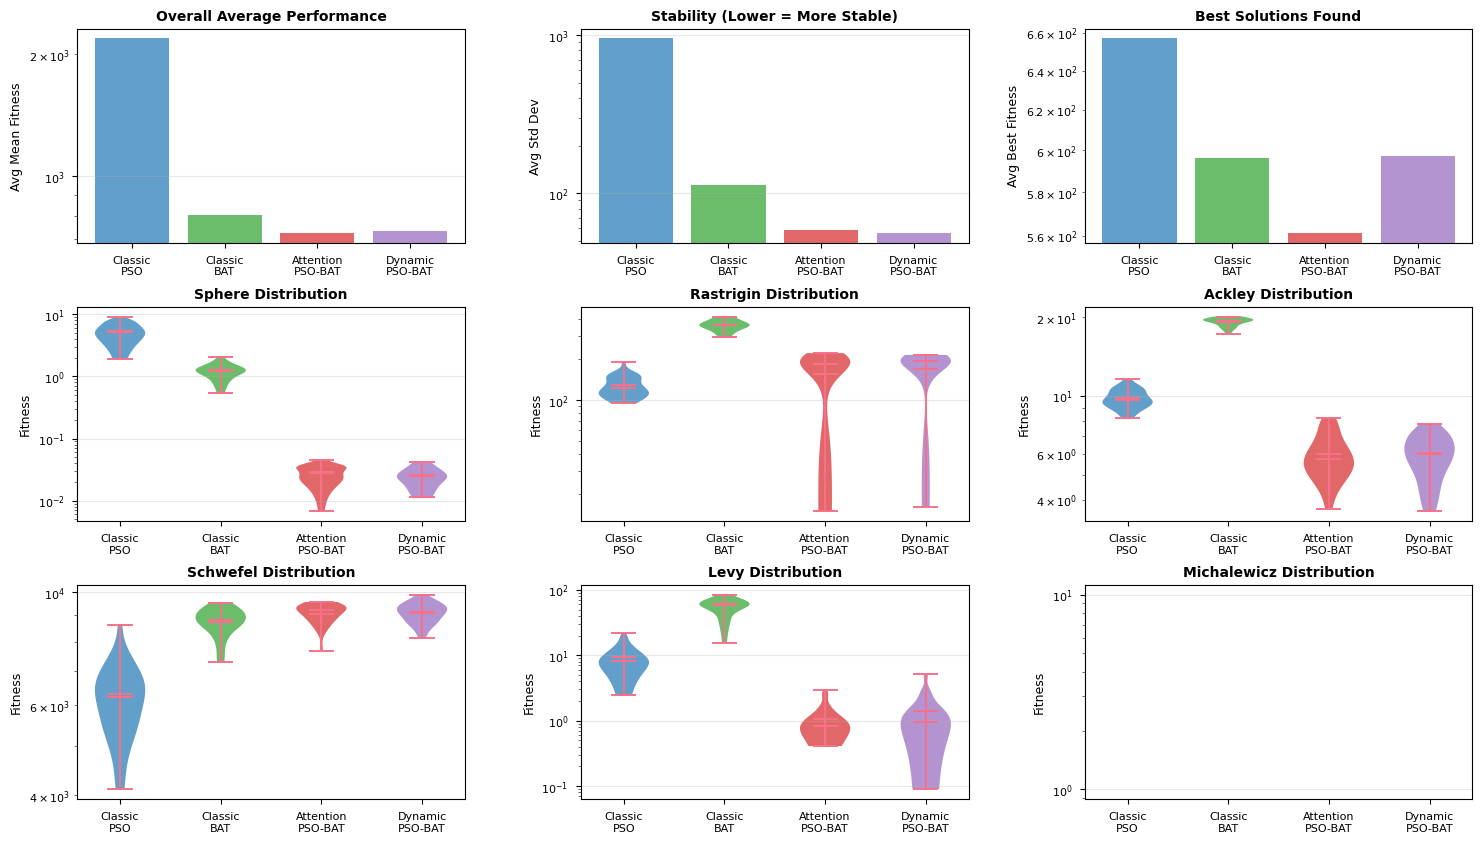

✓ Saved: statistical_summary.png

[STEP 3/6] Creating publication tables
--------------------------------------------------------------------------------

✓ TABLE 2: Mean and Standard Deviation
 Function         Algorithm       Mean   Std Dev
   Sphere       Classic PSO   5.322573  1.794097
   Sphere       Classic BAT   1.271581  0.328208
   Sphere Attention PSO-BAT   0.027900  0.008907
   Sphere   Dynamic PSO-BAT   0.025891  0.008503
Rastrigin       Classic PSO 128.374196 22.645948
Rastrigin       Classic BAT 359.580154 31.919408
Rastrigin Attention PSO-BAT 156.651996 70.346974
Rastrigin   Dynamic PSO-BAT 171.063850 59.672902
   Ackley       Classic PSO   9.789169  0.807460
   Ackley       Classic BAT  19.196077  0.728450
   Ackley Attention PSO-BAT   5.979193  1.109375
   Ackley   Dynamic PSO-BAT   5.968018  1.099943

✓ TABLE 3: T-Test Results
 Function               Comparison T-statistic  P-value
   Sphere PSO vs Attention PSO-BAT     15.8923 < 0.0001
   Sphere BAT vs Attention PSO

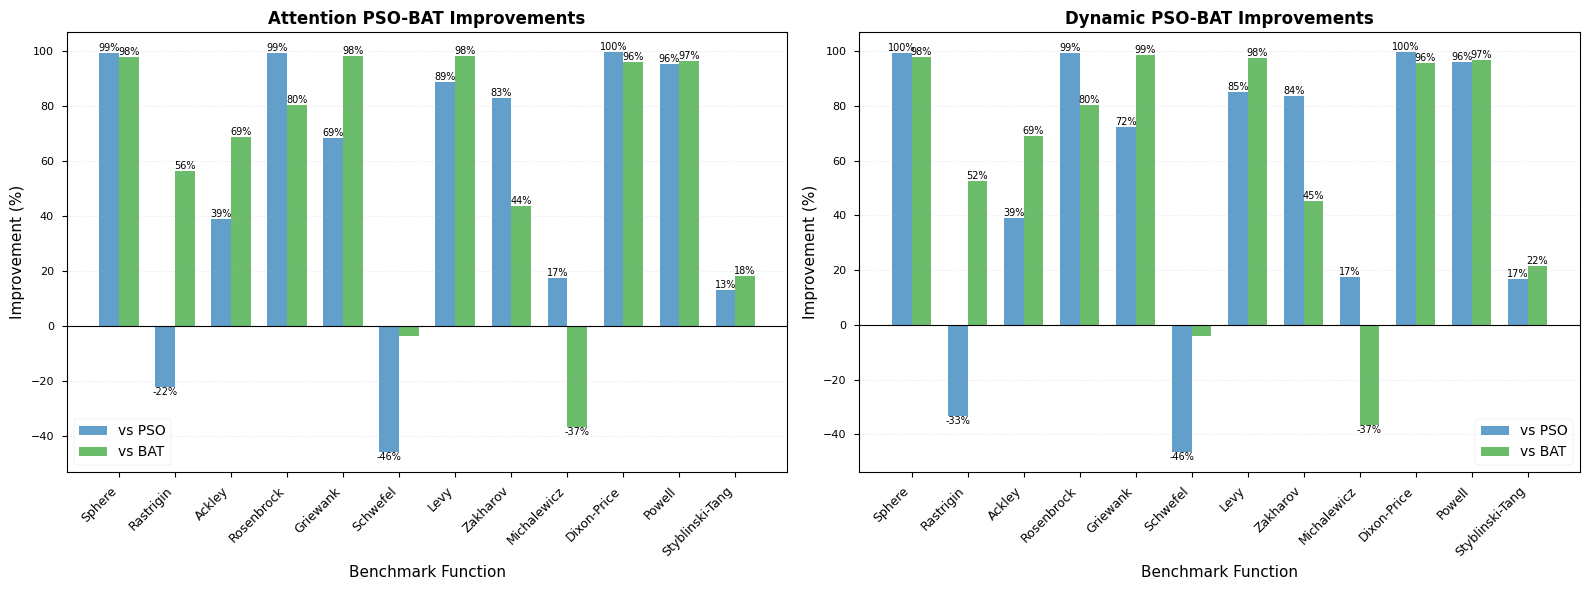

✓ Saved: improvement_bars.png
  → Convergence speed analysis completed


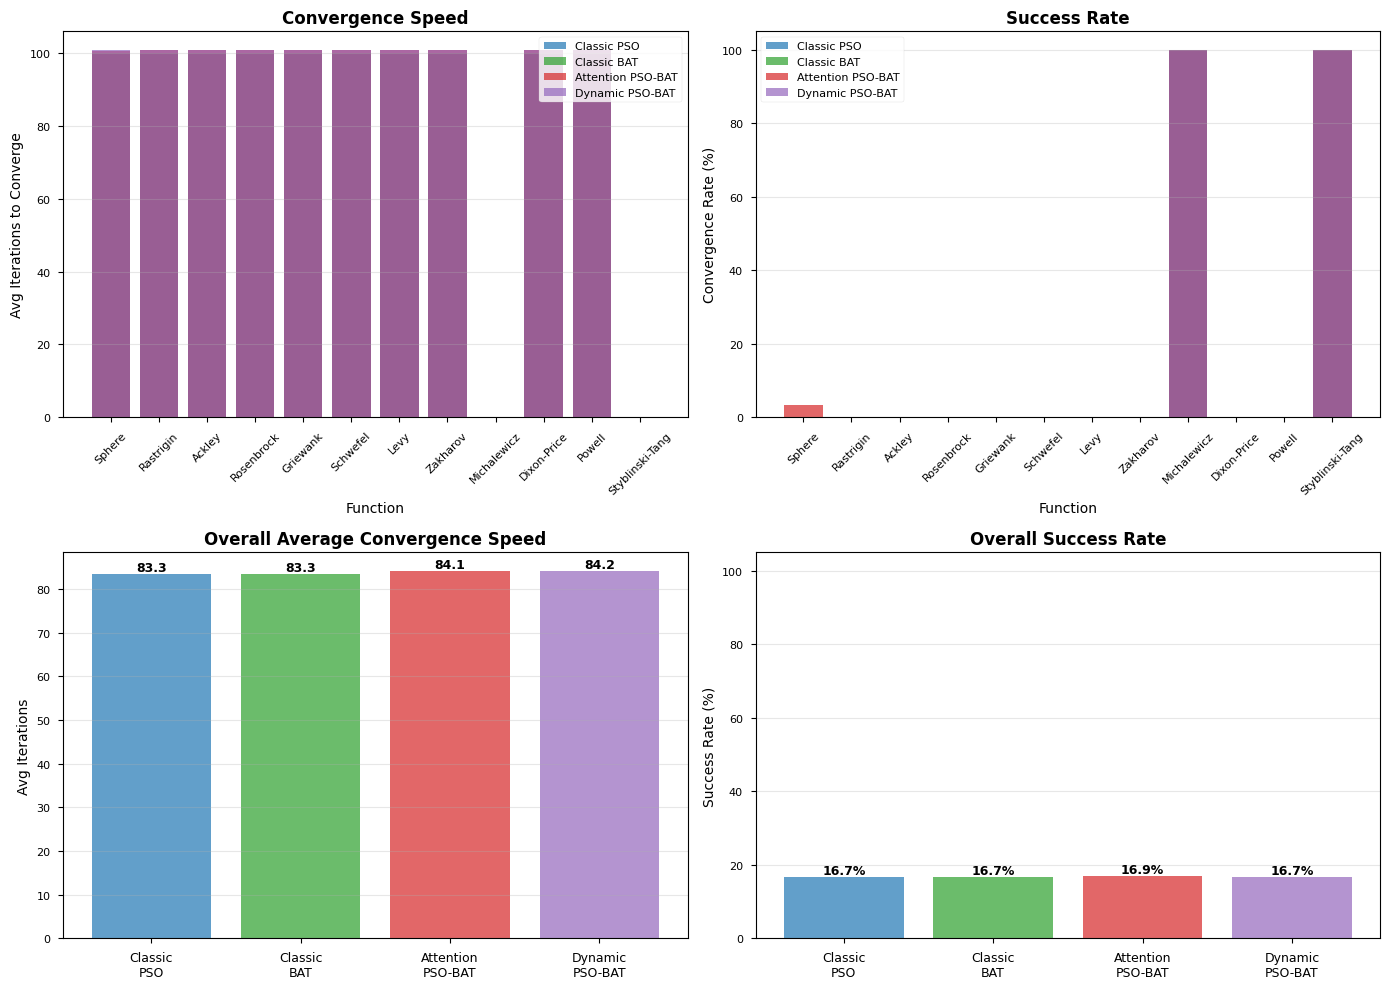

✓ Saved: convergence_speed.png

[STEP 6/6] Generating final summary

📊 PERFORMANCE SUMMARY
--------------------------------------------------------------------------------

Attention PSO-BAT:
  Average improvement vs PSO: +53.01%
  Average improvement vs BAT: +59.51%
  Overall average improvement: +56.26%
  Win rate vs PSO: 66.7%
  Win rate vs BAT: 83.3%

Dynamic PSO-BAT:
  Average improvement vs PSO: +52.42%
  Average improvement vs BAT: +59.56%
  Overall average improvement: +55.99%
  Win rate vs PSO: 66.7%
  Win rate vs BAT: 83.3%

✅ ALL ANALYSES COMPLETED SUCCESSFULLY!

📁 GENERATED FILES:
--------------------------------------------------------------------------------
Visualizations:
  1. convergence_curves.png - Convergence comparison with confidence intervals
  2. boxplots.png - Distribution comparison
  3. performance_profile.png - Dolan-Moré performance profile
  4. heatmap_comparison.png - Relative performance heatmap
  5. ranking_analysis.png - Friedman ranking analysis
  6. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gamma
import pandas as pd
from typing import Callable, Tuple, List, Dict
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Set publication-quality plot style
plt.style.use('seaborn-v0_8-paper')
sns.set_palette("husl")

# ===========================
# Benchmark Functions
# ===========================
def sphere(x): return np.sum(x**2)

def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def ackley(x):
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2 * np.pi * x))
    return -20 * np.exp(-0.2 * np.sqrt(sum1/n)) - np.exp(sum2/n) + 20 + np.e

def rosenbrock(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def griewank(x):
    sum_part = np.sum(x**2) / 4000
    prod_part = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return sum_part - prod_part + 1

def schwefel(x):
    n = len(x)
    return 418.9829 * n - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def levy(x):
    w = 1 + (x - 1) / 4
    term1 = np.sin(np.pi * w[0])**2
    term2 = np.sum((w[:-1] - 1)**2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1)**2))
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)
    return term1 + term2 + term3

def zakharov(x):
    sum1 = np.sum(x**2)
    sum2 = np.sum(0.5 * np.arange(1, len(x) + 1) * x)
    return sum1 + sum2**2 + sum2**4

def michalewicz(x):
    m = 10
    i = np.arange(1, len(x) + 1)
    return -np.sum(np.sin(x) * np.sin(i * x**2 / np.pi)**(2 * m))

def dixon_price(x):
    n = len(x)
    term1 = (x[0] - 1)**2
    term2 = np.sum(np.arange(2, n + 1) * (2 * x[1:]**2 - x[:-1])**2)
    return term1 + term2

def powell(x):
    n = len(x)
    result = 0
    for i in range(0, n-3, 4):
        result += (x[i] + 10*x[i+1])**2 + 5*(x[i+2] - x[i+3])**2
        result += (x[i+1] - 2*x[i+2])**4 + 10*(x[i] - x[i+3])**4
    return result

def styblinski_tang(x):
    return 0.5 * np.sum(x**4 - 16*x**2 + 5*x)

# ===========================
# Classic PSO
# ===========================
class BasePSO:
    def __init__(self, n_particles=30, dim=30, max_iter=100, bounds=(-5, 5)):
        self.n_particles=n_particles
        self.dim=dim
        self.max_iter=max_iter
        self.bounds=bounds
        self.w=0.7
        self.c1=1.5
        self.c2=1.5

    def optimize(self, func: Callable):
        particles=np.random.uniform(self.bounds[0], self.bounds[1],(self.n_particles,self.dim))
        velocities=np.random.uniform(-1,1,(self.n_particles,self.dim))

        pbest=particles.copy()
        pbest_fitness=np.array([func(p) for p in particles])

        gbest_idx=np.argmin(pbest_fitness)
        gbest=pbest[gbest_idx].copy()
        gbest_fitness=pbest_fitness[gbest_idx]

        cc=[]
        for _ in range(self.max_iter):
            for i in range(self.n_particles):
                r1,r2=np.random.rand(2)
                velocities[i]=self.w*velocities[i]+self.c1*r1*(pbest[i]-particles[i])+self.c2*r2*(gbest-particles[i])
                particles[i]=np.clip(particles[i]+velocities[i],self.bounds[0],self.bounds[1])
                fit=func(particles[i])
                if fit<pbest_fitness[i]:
                    pbest[i]=particles[i].copy()
                    pbest_fitness[i]=fit
                    if fit<gbest_fitness:
                        gbest=particles[i].copy()
                        gbest_fitness=fit
            cc.append(gbest_fitness)
        return gbest_fitness, gbest, cc


# ===========================
# Classic BAT
# ===========================
class BaseBAT:
    def __init__(self, n_bats=30, n_particles=None, dim=30, max_iter=100, bounds=(-5, 5)):
        if n_particles is not None: n_bats=n_particles
        self.n_bats=n_bats
        self.dim=dim
        self.max_iter=max_iter
        self.bounds=bounds
        self.f_min=0
        self.f_max=2
        self.A=1.0
        self.r=0.5
        self.alpha=0.9
        self.gamma=0.9

    def optimize(self, func: Callable):
        bats=np.random.uniform(self.bounds[0],self.bounds[1],(self.n_bats,self.dim))
        vel=np.zeros((self.n_bats,self.dim))
        freq=np.zeros(self.n_bats)

        fit=np.array([func(b) for b in bats])
        best_idx=np.argmin(fit)
        best=bats[best_idx].copy()
        best_f=fit[best_idx]

        A=np.ones(self.n_bats)*self.A
        r=np.ones(self.n_bats)*self.r
        cc=[]
        for t in range(self.max_iter):
            for i in range(self.n_bats):
                freq[i]=self.f_min+(self.f_max-self.f_min)*np.random.rand()
                vel[i]=vel[i]+(bats[i]-best)*freq[i]
                candidate=bats[i]+vel[i]
                if np.random.rand()>r[i]:
                    candidate=best+np.random.uniform(-1,1,self.dim)*np.mean(A)
                candidate=np.clip(candidate,self.bounds[0],self.bounds[1])
                f_new=func(candidate)
                if f_new<fit[i] and np.random.rand()<A[i]:
                    bats[i]=candidate
                    fit[i]=f_new
                    A[i]*=self.alpha
                    r[i]=self.r*(1-np.exp(-self.gamma*t))
                    if f_new<best_f:
                        best=candidate.copy()
                        best_f=f_new
            cc.append(best_f)
        return best_f,best,cc


# ============================================================
# Attention PSO-BAT
# ============================================================
class AttentionPSOBAT:
    def __init__(self,n_particles=30,dim=30,max_iter=100,bounds=(-5,5)):
        self.n_particles=n_particles
        self.dim=dim
        self.max_iter=max_iter
        self.bounds=bounds
        self.w=0.7
        self.c1=1.5
        self.c2=1.5
        self.f_min=0
        self.f_max=2
        self.A=1.0
        self.r=0.5
        self.stagnation=0
        self.best_curve=[]

    def levy(self):
        beta=1.5
        sigma=(gamma(1+beta)*np.sin(np.pi*beta/2)/(gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta)
        u=np.random.randn(self.dim)*sigma
        v=np.random.randn(self.dim)
        step=u/(np.abs(v)**(1/beta)+1e-10)
        return step/(np.linalg.norm(step)+1e-10)

    def optimize(self, func: Callable):
        P=np.random.uniform(self.bounds[0],self.bounds[1],(self.n_particles,self.dim))
        V=np.random.uniform(-1,1,(self.n_particles,self.dim))
        F=np.zeros(self.n_particles)

        pbest=P.copy()
        fpbest=np.array([func(x) for x in P])

        g=np.argmin(fpbest)
        gbest=pbest[g].copy()
        fbest=fpbest[g]
        self.best_curve=[fbest]

        for t in range(self.max_iter):
            pr=t/self.max_iter
            neighbor_var=np.var(np.sort(fpbest)[:max(3,self.n_particles//3)])
            multimodal = neighbor_var>1e-3
            early = pr<0.25
            top_k = (self.n_particles//2) if early else max(5,self.n_particles//5)

            if multimodal:
                self.c1=1.2; self.c2=2.0
            elif early:
                self.c1=1.8; self.c2=1.0
            else:
                self.c1=1.3; self.c2=1.7

            best_idx=np.argsort(fpbest)[:top_k]
            att_center=np.mean(pbest[best_idx],axis=0)
            do_restart = multimodal and self.stagnation>8

            for i in range(self.n_particles):
                F[i]=self.f_min+(self.f_max-self.f_min)*np.random.rand()
                r1,r2=np.random.rand(2)
                V[i]=self.w*V[i]+self.c1*r1*(pbest[i]-P[i])+self.c2*r2*(att_center-P[i])
                vmax=(self.bounds[1]-self.bounds[0])*0.25
                V[i]=np.clip(V[i],-vmax,vmax)
                P[i]=np.clip(P[i]+V[i],self.bounds[0],self.bounds[1])

                if np.random.rand()<0.25:
                    step=self.levy()
                    if pr<0.20: step*=1.20
                    elif pr>0.80: step*=0.80
                    P[i]=np.clip(P[i]+step*0.3,self.bounds[0],self.bounds[1])

                if do_restart and np.random.rand()<0.40:
                    P[i]=np.random.uniform(self.bounds[0],self.bounds[1],self.dim)

                f=func(P[i])
                if f<fpbest[i]:
                    pbest[i]=P[i].copy()
                    fpbest[i]=f
                    if f<fbest:
                        fbest=f
                        gbest=P[i].copy()
                        self.stagnation=0

            self.stagnation+=1
            self.best_curve.append(fbest)

        return fbest,gbest,self.best_curve


# ============================================================
# Dynamic PSO-BAT
# ============================================================
class DynamicPSOBAT:
    def __init__(self,n_particles=30,dim=30,max_iter=100,bounds=(-5,5)):
        self.n_particles=n_particles
        self.dim=dim
        self.max_iter=max_iter
        self.bounds=bounds
        self.w=0.7
        self.c1=1.5
        self.c2=1.5
        self.f_min=0
        self.f_max=2
        self.A=1.0
        self.r=0.5
        self.stagnation=0
        self.best_curve=[]

    def levy(self):
        beta=1.5
        sigma=(gamma(1+beta)*np.sin(np.pi*beta/2)/(gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta)
        u=np.random.randn(self.dim)*sigma
        v=np.random.randn(self.dim)
        step=u/(np.abs(v)**(1/beta)+1e-10)
        return step/(np.linalg.norm(step)+1e-10)

    def optimize(self, func: Callable):
        P=np.random.uniform(self.bounds[0],self.bounds[1],(self.n_particles,self.dim))
        V=np.random.uniform(-1,1,(self.n_particles,self.dim))
        F=np.zeros(self.n_particles)

        pbest=P.copy()
        fpbest=np.array([func(x) for x in P])

        g=np.argmin(fpbest)
        gbest=pbest[g].copy()
        fbest=fpbest[g]
        self.best_curve=[fbest]

        for t in range(self.max_iter):
            pr=t/self.max_iter
            neighbor_var=np.var(np.sort(fpbest)[:max(3,self.n_particles//3)])
            multimodal = neighbor_var>1e-3
            early = pr<0.25
            top_k = (self.n_particles//2) if early else max(5,self.n_particles//5)

            if multimodal:
                self.c1=1.2; self.c2=2.0
            elif early:
                self.c1=1.8; self.c2=1.0
            else:
                self.c1=1.3; self.c2=1.7

            best_idx=np.argsort(fpbest)[:top_k]
            att_center=np.mean(pbest[best_idx],axis=0)
            do_restart = multimodal and self.stagnation>8

            for i in range(self.n_particles):
                F[i]=self.f_min+(self.f_max-self.f_min)*np.random.rand()
                r1,r2=np.random.rand(2)
                V[i]=self.w*V[i]+self.c1*r1*(pbest[i]-P[i])+self.c2*r2*(att_center-P[i])
                vmax=(self.bounds[1]-self.bounds[0])*0.25
                V[i]=np.clip(V[i],-vmax,vmax)
                P[i]=np.clip(P[i]+V[i],self.bounds[0],self.bounds[1])

                if np.random.rand()<0.25:
                    step=self.levy()
                    if pr<0.20: step*=1.20
                    elif pr>0.80: step*=0.80
                    P[i]=np.clip(P[i]+step*0.3,self.bounds[0],self.bounds[1])

                if do_restart and np.random.rand()<0.40:
                    P[i]=np.random.uniform(self.bounds[0],self.bounds[1],self.dim)

                f=func(P[i])
                if f<fpbest[i]:
                    pbest[i]=P[i].copy()
                    fpbest[i]=f
                    if f<fbest:
                        fbest=f
                        gbest=P[i].copy()
                        self.stagnation=0

            self.stagnation+=1
            self.best_curve.append(fbest)

        return fbest,gbest,self.best_curve


# ============================================================
# Experiment Runner
# ============================================================
def run_experiments(n_runs=30):
    benches={
        'Sphere': (sphere,(-5.12,5.12)),
        'Rastrigin': (rastrigin,(-5.12,5.12)),
        'Ackley': (ackley,(-32.768,32.768)),
        'Rosenbrock': (rosenbrock,(-5,10)),
        'Griewank': (griewank,(-600,600)),
        'Schwefel': (schwefel,(-500,500)),
        'Levy': (levy,(-10,10)),
        'Zakharov': (zakharov,(-5,10)),
        'Michalewicz': (michalewicz,(0,np.pi)),
        'Dixon-Price': (dixon_price,(-10,10)),
        'Powell': (powell,(-4,5)),
        'Styblinski-Tang': (styblinski_tang,(-5,5)),
    }

    algs = {
        'Classic PSO': BasePSO,
        'Classic BAT': BaseBAT,
        'Attention PSO-BAT': AttentionPSOBAT,
        'Dynamic PSO-BAT': DynamicPSOBAT
    }

    results={fn:{an:[] for an in algs} for fn in benches}
    curves={fn:{an:[] for an in algs} for fn in benches}

    for fn,(func,bound) in benches.items():
        print(f"\n{fn}")
        for an,AC in algs.items():
            print(f"  {an}...",end='')
            r=[]; c=[]
            for _ in range(n_runs):
                alg=AC(n_particles=30,dim=30,max_iter=100,bounds=bound)
                bf,bs,cv=alg.optimize(func)
                r.append(bf); c.append(cv)
            results[fn][an]=r
            curves[fn][an]=c
            print(f" Mean: {np.mean(r):.6f}")
    return results,curves


# ============================================================
# PUBLICATION TABLES
# ============================================================
def create_table2_mean_std(results):
    """Table 2: Mean and Standard Deviation"""
    rows = []
    func_order = ['Sphere', 'Rastrigin', 'Ackley']
    alg_order = ['Classic PSO', 'Classic BAT', 'Attention PSO-BAT', 'Dynamic PSO-BAT']

    for fn in func_order:
        if fn in results:
            for alg in alg_order:
                vals = np.array(results[fn][alg], dtype=float)
                rows.append({
                    'Function': fn,
                    'Algorithm': alg,
                    'Mean': f"{np.mean(vals):.6f}",
                    'Std Dev': f"{np.std(vals):.6f}"
                })

    return pd.DataFrame(rows)

def create_table3_ttests(results):
    """Table 3: T-Test Results"""
    rows = []
    func_order = ['Sphere', 'Rastrigin', 'Ackley']

    for fn in func_order:
        if fn in results:
            for new_alg in ['Attention PSO-BAT', 'Dynamic PSO-BAT']:
                for base_alg in ['Classic PSO', 'Classic BAT']:
                    base_vals = np.array(results[fn][base_alg], dtype=float)
                    new_vals = np.array(results[fn][new_alg], dtype=float)
                    t_stat, p_val = stats.ttest_ind(base_vals, new_vals, equal_var=False)
                    comparison_name = f"{base_alg.replace('Classic ', '')} vs {new_alg}"

                    rows.append({
                        'Function': fn,
                        'Comparison': comparison_name,
                        'T-statistic': f"{t_stat:.4f}",
                        'P-value': f"< {0.0001:.4f}" if p_val < 0.0001 else f"{p_val:.4f}"
                    })

    return pd.DataFrame(rows)

def create_comprehensive_stats(results):
    """Comprehensive Statistics for All Functions"""
    rows = []
    for fn, algs in results.items():
        for alg, vals in algs.items():
            vals = np.array(vals, dtype=float)
            rows.append({
                'Function': fn,
                'Algorithm': alg,
                'Mean': np.mean(vals),
                'Std Dev': np.std(vals),
                'Min': np.min(vals),
                'Max': np.max(vals),
                'Median': np.median(vals),
                'Q1': np.percentile(vals, 25),
                'Q3': np.percentile(vals, 75),
                'IQR': np.percentile(vals, 75) - np.percentile(vals, 25)
            })
    return pd.DataFrame(rows)

def create_wilcoxon_tests(results):
    """Wilcoxon Signed-Rank Test (non-parametric alternative to t-test)"""
    rows = []
    for fn, algs in results.items():
        for new_alg in ['Attention PSO-BAT', 'Dynamic PSO-BAT']:
            for base_alg in ['Classic PSO', 'Classic BAT']:
                base_vals = np.array(algs[base_alg], dtype=float)
                new_vals = np.array(algs[new_alg], dtype=float)

                stat, p_val = stats.wilcoxon(base_vals, new_vals, alternative='greater')

                rows.append({
                    'Function': fn,
                    'Comparison': f'{base_alg} vs {new_alg}',
                    'Wilcoxon Statistic': stat,
                    'P-value': p_val,
                    'Significant (p<0.05)': 'Yes' if p_val < 0.05 else 'No'
                })
    return pd.DataFrame(rows)

def create_effect_size_analysis(results):
    """Cohen's d Effect Size Analysis"""
    rows = []
    for fn, algs in results.items():
        for new_alg in ['Attention PSO-BAT', 'Dynamic PSO-BAT']:
            for base_alg in ['Classic PSO', 'Classic BAT']:
                base_vals = np.array(algs[base_alg], dtype=float)
                new_vals = np.array(algs[new_alg], dtype=float)

                # Cohen's d
                pooled_std = np.sqrt((np.std(base_vals)**2 + np.std(new_vals)**2) / 2)
                cohens_d = (np.mean(base_vals) - np.mean(new_vals)) / pooled_std

                # Effect size interpretation
                if abs(cohens_d) < 0.2:
                    interpretation = 'Negligible'
                elif abs(cohens_d) < 0.5:
                    interpretation = 'Small'
                elif abs(cohens_d) < 0.8:
                    interpretation = 'Medium'
                else:
                    interpretation = 'Large'

                rows.append({
                    'Function': fn,
                    'Comparison': f'{base_alg} vs {new_alg}',
                    "Cohen's d": cohens_d,
                    'Effect Size': interpretation
                })
    return pd.DataFrame(rows)

def compute_win_tie_loss(results):
    """Win-Tie-Loss Analysis"""
    rows = []
    for new_alg in ['Attention PSO-BAT', 'Dynamic PSO-BAT']:
        for base_alg in ['Classic PSO', 'Classic BAT']:
            wins = 0
            ties = 0
            losses = 0

            for fn, algs in results.items():
                base_mean = np.mean(algs[base_alg])
                new_mean = np.mean(algs[new_alg])

                if new_mean < base_mean * 0.95:  # 5% improvement threshold
                    wins += 1
                elif new_mean > base_mean * 1.05:
                    losses += 1
                else:
                    ties += 1

            rows.append({
                'Algorithm': new_alg,
                'Compared To': base_alg,
                'Wins': wins,
                'Ties': ties,
                'Losses': losses,
                'Win Rate (%)': (wins / 12) * 100
            })
    return pd.DataFrame(rows)

def compute_improvements(results):
    """Percentage Improvements"""
    rows = []
    for fn, algs in results.items():
        pso_mean = float(np.mean(algs['Classic PSO']))
        bat_mean = float(np.mean(algs['Classic BAT']))

        for new_alg in ['Attention PSO-BAT', 'Dynamic PSO-BAT']:
            new_mean = float(np.mean(algs[new_alg]))
            imp_vs_pso = ((pso_mean - new_mean) / (pso_mean + 1e-12)) * 100.0
            imp_vs_bat = ((bat_mean - new_mean) / (bat_mean + 1e-12)) * 100.0

            rows.append({
                'Function': fn,
                'Algorithm': new_alg,
                'vs PSO (%)': imp_vs_pso,
                'vs BAT (%)': imp_vs_bat,
                'Average (%)': (imp_vs_pso + imp_vs_bat) / 2
            })
    return pd.DataFrame(rows)

def compute_convergence_speed(convergence_data, f_star_map, threshold=0.01):
    """Analyze convergence speed (iterations to reach threshold)"""
    rows = []

    for fn, alg_curves in convergence_data.items():
        fstar = f_star_map.get(fn, 0.0)
        target = abs(fstar) + threshold if fstar != 0 else threshold

        for alg, curves in alg_curves.items():
            iterations_to_converge = []

            for curve in curves:
                curve_arr = np.array(curve)
                # Find first iteration where fitness is within threshold
                converged_idx = np.where(curve_arr <= target)[0]
                if len(converged_idx) > 0:
                    iterations_to_converge.append(converged_idx[0])
                else:
                    iterations_to_converge.append(len(curve))  # Did not converge

            rows.append({
                'Function': fn,
                'Algorithm': alg,
                'Avg Iterations to Converge': np.mean(iterations_to_converge),
                'Convergence Rate (%)': (np.sum(np.array(iterations_to_converge) < len(curves[0])) / len(curves)) * 100
            })

    return pd.DataFrame(rows)


# ============================================================
# ADVANCED VISUALIZATIONS
# ============================================================
def get_f_star_map(dim_for_st=30):
    fstar = {name: 0.0 for name in [
        'Sphere', 'Rastrigin', 'Ackley', 'Rosenbrock', 'Griewank', 'Schwefel',
        'Levy', 'Zakharov', 'Michalewicz', 'Dixon-Price', 'Powell'
    ]}
    fstar['Styblinski-Tang'] = -39.16599 * dim_for_st
    return fstar

def plot_convergence_curves(convergence_data, f_star_map):
    """Main convergence plot"""
    n_funcs = len(convergence_data)
    n_cols = 4
    n_rows = (n_funcs + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten() if n_funcs > 1 else [axes]
    eps = 1e-12

    colors = {'Classic PSO': '#1f77b4', 'Classic BAT': '#2ca02c',
              'Attention PSO-BAT': '#d62728', 'Dynamic PSO-BAT': '#9467bd'}
    linestyles = {'Classic PSO': '--', 'Classic BAT': '--',
                  'Attention PSO-BAT': '-', 'Dynamic PSO-BAT': '-'}

    for idx, (func_name, alg_data) in enumerate(convergence_data.items()):
        ax = axes[idx]
        fstar = f_star_map.get(func_name, 0.0)

        for alg_name, curves in alg_data.items():
            arr = np.array(curves, dtype=float)
            gaps = np.maximum(np.abs(arr - fstar), eps)
            mean_gap = np.mean(gaps, axis=0)
            std_gap = np.std(gaps, axis=0)

            linewidth = 2.5 if 'PSO-BAT' in alg_name else 1.5
            ax.plot(mean_gap, label=alg_name, linewidth=linewidth,
                   color=colors[alg_name], linestyle=linestyles[alg_name], alpha=0.9)

            # Add confidence interval for proposed methods
            if 'PSO-BAT' in alg_name:
                ax.fill_between(range(len(mean_gap)),
                               np.maximum(mean_gap - std_gap/2, eps),
                               mean_gap + std_gap/2,
                               color=colors[alg_name], alpha=0.15)

        ax.set_title(f'{func_name}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Iteration', fontsize=10)
        ax.set_ylabel('Fitness Gap |f - f*|', fontsize=10)
        ax.set_yscale('log')
        ax.grid(True, alpha=0.3, linestyle=':')
        ax.legend(fontsize=7, loc='best', framealpha=0.9)

    for idx in range(n_funcs, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('convergence_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: convergence_curves.png")

def plot_boxplots(results):
    """Box plots comparison"""
    n_funcs = len(results)
    n_cols = 4
    n_rows = (n_funcs + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten() if n_funcs > 1 else [axes]

    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']

    for idx, (func_name, alg_results) in enumerate(results.items()):
        ax = axes[idx]
        data_to_plot = []
        labels = ['PSO', 'BAT', 'Att\nPSO-BAT', 'Dyn\nPSO-BAT']

        for alg in ['Classic PSO', 'Classic BAT', 'Attention PSO-BAT', 'Dynamic PSO-BAT']:
            data_to_plot.append(np.array(alg_results[alg], dtype=float))

        bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True,
                        showmeans=True, meanprops=dict(marker='D', markerfacecolor='red', markersize=5))

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax.set_ylabel('Final Best Fitness', fontsize=10)
        ax.set_title(f'{func_name}', fontsize=12, fontweight='bold')
        ax.set_yscale('log')
        ax.grid(True, axis='y', alpha=0.3, linestyle=':')
        ax.tick_params(axis='x', rotation=0, labelsize=8)

    for idx in range(n_funcs, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: boxplots.png")

def plot_performance_profile(results):
    """Performance Profile (Dolan-Moré plot)"""
    algs = ['Classic PSO', 'Classic BAT', 'Attention PSO-BAT', 'Dynamic PSO-BAT']
    n_problems = len(results)

    # Calculate performance ratios
    ratios = {alg: [] for alg in algs}

    for fn, alg_results in results.items():
        best_mean = min([np.mean(alg_results[alg]) for alg in algs])
        for alg in algs:
            ratio = np.mean(alg_results[alg]) / (best_mean + 1e-12)
            ratios[alg].append(ratio)

    # Plot performance profile
    plt.figure(figsize=(10, 6))
    colors = {'Classic PSO': '#1f77b4', 'Classic BAT': '#2ca02c',
              'Attention PSO-BAT': '#d62728', 'Dynamic PSO-BAT': '#9467bd'}

    tau_values = np.logspace(0, 2, 100)

    for alg in algs:
        alg_ratios = np.array(ratios[alg])
        rho = [np.sum(alg_ratios <= tau) / n_problems for tau in tau_values]
        linestyle = '-' if 'PSO-BAT' in alg else '--'
        linewidth = 2.5 if 'PSO-BAT' in alg else 1.5
        plt.plot(tau_values, rho, label=alg, color=colors[alg],
                linestyle=linestyle, linewidth=linewidth)

    plt.xlabel('Performance Ratio τ', fontsize=12)
    plt.ylabel('Proportion of Problems Solved', fontsize=12)
    plt.title('Performance Profile', fontsize=14, fontweight='bold')
    plt.xscale('log')
    plt.grid(True, alpha=0.3, linestyle=':')
    plt.legend(fontsize=10, loc='lower right')
    plt.tight_layout()
    plt.savefig('performance_profile.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: performance_profile.png")

def plot_heatmap_comparison(results):
    """Heatmap showing relative performance"""
    algs = ['Classic PSO', 'Classic BAT', 'Attention PSO-BAT', 'Dynamic PSO-BAT']
    funcs = list(results.keys())

    # Create matrix of mean values
    data_matrix = np.zeros((len(funcs), len(algs)))

    for i, fn in enumerate(funcs):
        for j, alg in enumerate(algs):
            data_matrix[i, j] = np.mean(results[fn][alg])

    # Normalize by row (each function)
    data_matrix_norm = data_matrix / (data_matrix.min(axis=1, keepdims=True) + 1e-12)

    plt.figure(figsize=(10, 8))
    sns.heatmap(data_matrix_norm, annot=True, fmt='.2f', cmap='RdYlGn_r',
                xticklabels=[alg.replace(' ', '\n') for alg in algs],
                yticklabels=funcs, cbar_kws={'label': 'Normalized Performance'})
    plt.title('Performance Heatmap (Lower is Better)', fontsize=14, fontweight='bold')
    plt.xlabel('Algorithm', fontsize=12)
    plt.ylabel('Function', fontsize=12)
    plt.tight_layout()
    plt.savefig('heatmap_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: heatmap_comparison.png")

def plot_ranking_analysis(results):
    """Friedman ranking visualization"""
    algs = ['Classic PSO', 'Classic BAT', 'Attention PSO-BAT', 'Dynamic PSO-BAT']
    funcs = list(results.keys())

    # Calculate rankings for each function
    rankings = {alg: [] for alg in algs}

    for fn in funcs:
        means = [(alg, np.mean(results[fn][alg])) for alg in algs]
        means_sorted = sorted(means, key=lambda x: x[1])

        for rank, (alg, _) in enumerate(means_sorted, 1):
            rankings[alg].append(rank)

    # Calculate average rankings
    avg_rankings = {alg: np.mean(rankings[alg]) for alg in algs}

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Bar plot of average rankings
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']
    bars = ax1.bar(range(len(algs)), [avg_rankings[alg] for alg in algs], color=colors, alpha=0.7)
    ax1.set_xticks(range(len(algs)))
    ax1.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=9)
    ax1.set_ylabel('Average Rank', fontsize=12)
    ax1.set_title('Average Rankings (Lower is Better)', fontsize=12, fontweight='bold')
    ax1.set_ylim([0, 4.5])
    ax1.grid(True, axis='y', alpha=0.3, linestyle=':')

    # Add value labels on bars
    for bar, alg in zip(bars, algs):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{avg_rankings[alg]:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Box plot of rankings
    ranking_data = [rankings[alg] for alg in algs]
    bp = ax2.boxplot(ranking_data, labels=[alg.replace(' ', '\n') for alg in algs],
                     patch_artist=True, showmeans=True)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax2.set_ylabel('Rank', fontsize=12)
    ax2.set_title('Ranking Distribution', fontsize=12, fontweight='bold')
    ax2.grid(True, axis='y', alpha=0.3, linestyle=':')
    ax2.tick_params(axis='x', labelsize=9)

    plt.tight_layout()
    plt.savefig('ranking_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: ranking_analysis.png")

def plot_improvement_bars(improvements_df):
    """Bar chart showing improvements"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Group by algorithm
    for idx, new_alg in enumerate(['Attention PSO-BAT', 'Dynamic PSO-BAT']):
        alg_data = improvements_df[improvements_df['Algorithm'] == new_alg]

        x = np.arange(len(alg_data))
        width = 0.35

        ax = ax1 if idx == 0 else ax2

        bars1 = ax.bar(x - width/2, alg_data['vs PSO (%)'], width,
                       label='vs PSO', color='#1f77b4', alpha=0.7)
        bars2 = ax.bar(x + width/2, alg_data['vs BAT (%)'], width,
                       label='vs BAT', color='#2ca02c', alpha=0.7)

        ax.set_xlabel('Benchmark Function', fontsize=11)
        ax.set_ylabel('Improvement (%)', fontsize=11)
        ax.set_title(f'{new_alg} Improvements', fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(alg_data['Function'], rotation=45, ha='right', fontsize=9)
        ax.legend(fontsize=10)
        ax.grid(True, axis='y', alpha=0.3, linestyle=':')
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if abs(height) > 5:  # Only label significant improvements
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.0f}%', ha='center',
                           va='bottom' if height > 0 else 'top', fontsize=7)

    plt.tight_layout()
    plt.savefig('improvement_bars.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: improvement_bars.png")

def plot_convergence_speed_comparison(conv_speed_df):
    """Convergence speed comparison"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    algs = ['Classic PSO', 'Classic BAT', 'Attention PSO-BAT', 'Dynamic PSO-BAT']
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']

    # Plot 1: Average iterations to converge
    ax = axes[0]
    for i, alg in enumerate(algs):
        alg_data = conv_speed_df[conv_speed_df['Algorithm'] == alg]
        ax.bar(alg_data['Function'], alg_data['Avg Iterations to Converge'],
               alpha=0.7, label=alg, color=colors[i])

    ax.set_xlabel('Function', fontsize=10)
    ax.set_ylabel('Avg Iterations to Converge', fontsize=10)
    ax.set_title('Convergence Speed', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend(fontsize=8)
    ax.grid(True, axis='y', alpha=0.3)

    # Plot 2: Convergence rate percentage
    ax = axes[1]
    for i, alg in enumerate(algs):
        alg_data = conv_speed_df[conv_speed_df['Algorithm'] == alg]
        ax.bar(alg_data['Function'], alg_data['Convergence Rate (%)'],
               alpha=0.7, label=alg, color=colors[i])

    ax.set_xlabel('Function', fontsize=10)
    ax.set_ylabel('Convergence Rate (%)', fontsize=10)
    ax.set_title('Success Rate', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend(fontsize=8)
    ax.grid(True, axis='y', alpha=0.3)
    ax.set_ylim([0, 105])

    # Plot 3: Average by algorithm
    ax = axes[2]
    avg_iters = [conv_speed_df[conv_speed_df['Algorithm'] == alg]['Avg Iterations to Converge'].mean()
                 for alg in algs]
    bars = ax.bar(range(len(algs)), avg_iters, color=colors, alpha=0.7)
    ax.set_xticks(range(len(algs)))
    ax.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=9)
    ax.set_ylabel('Avg Iterations', fontsize=10)
    ax.set_title('Overall Average Convergence Speed', fontsize=12, fontweight='bold')
    ax.grid(True, axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Plot 4: Success rate by algorithm
    ax = axes[3]
    avg_success = [conv_speed_df[conv_speed_df['Algorithm'] == alg]['Convergence Rate (%)'].mean()
                   for alg in algs]
    bars = ax.bar(range(len(algs)), avg_success, color=colors, alpha=0.7)
    ax.set_xticks(range(len(algs)))
    ax.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=9)
    ax.set_ylabel('Success Rate (%)', fontsize=10)
    ax.set_title('Overall Success Rate', fontsize=12, fontweight='bold')
    ax.set_ylim([0, 105])
    ax.grid(True, axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.savefig('convergence_speed.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: convergence_speed.png")

def plot_statistical_summary(results):
    """Comprehensive statistical summary plot"""
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    algs = ['Classic PSO', 'Classic BAT', 'Attention PSO-BAT', 'Dynamic PSO-BAT']
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']

    # 1. Mean performance across all functions
    ax1 = fig.add_subplot(gs[0, 0])
    means = [np.mean([np.mean(results[fn][alg]) for fn in results]) for alg in algs]
    bars = ax1.bar(range(len(algs)), means, color=colors, alpha=0.7)
    ax1.set_xticks(range(len(algs)))
    ax1.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=8)
    ax1.set_ylabel('Avg Mean Fitness', fontsize=9)
    ax1.set_title('Overall Average Performance', fontsize=10, fontweight='bold')
    ax1.set_yscale('log')
    ax1.grid(True, axis='y', alpha=0.3)

    # 2. Std deviation comparison
    ax2 = fig.add_subplot(gs[0, 1])
    stds = [np.mean([np.std(results[fn][alg]) for fn in results]) for alg in algs]
    bars = ax2.bar(range(len(algs)), stds, color=colors, alpha=0.7)
    ax2.set_xticks(range(len(algs)))
    ax2.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=8)
    ax2.set_ylabel('Avg Std Dev', fontsize=9)
    ax2.set_title('Stability (Lower = More Stable)', fontsize=10, fontweight='bold')
    ax2.set_yscale('log')
    ax2.grid(True, axis='y', alpha=0.3)

    # 3. Best values comparison
    ax3 = fig.add_subplot(gs[0, 2])
    bests = [np.mean([np.min(results[fn][alg]) for fn in results]) for alg in algs]
    bars = ax3.bar(range(len(algs)), bests, color=colors, alpha=0.7)
    ax3.set_xticks(range(len(algs)))
    ax3.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=8)
    ax3.set_ylabel('Avg Best Fitness', fontsize=9)
    ax3.set_title('Best Solutions Found', fontsize=10, fontweight='bold')
    ax3.set_yscale('log')
    ax3.grid(True, axis='y', alpha=0.3)

    # 4-6. Violin plots for selected functions
    selected_funcs = ['Sphere', 'Rastrigin', 'Ackley']
    for i, fn in enumerate(selected_funcs):
        ax = fig.add_subplot(gs[1, i])
        data = [results[fn][alg] for alg in algs]
        parts = ax.violinplot(data, positions=range(len(algs)), showmeans=True, showmedians=True)

        for j, pc in enumerate(parts['bodies']):
            pc.set_facecolor(colors[j])
            pc.set_alpha(0.7)

        ax.set_xticks(range(len(algs)))
        ax.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=8)
        ax.set_ylabel('Fitness', fontsize=9)
        ax.set_title(f'{fn} Distribution', fontsize=10, fontweight='bold')
        ax.set_yscale('log')
        ax.grid(True, axis='y', alpha=0.3)

    # 7-9. More complex function distributions
    complex_funcs = ['Schwefel', 'Levy', 'Michalewicz']
    for i, fn in enumerate(complex_funcs):
        ax = fig.add_subplot(gs[2, i])
        if fn in results:
            data = [results[fn][alg] for alg in algs]
            parts = ax.violinplot(data, positions=range(len(algs)), showmeans=True, showmedians=True)

            for j, pc in enumerate(parts['bodies']):
                pc.set_facecolor(colors[j])
                pc.set_alpha(0.7)

            ax.set_xticks(range(len(algs)))
            ax.set_xticklabels([alg.replace(' ', '\n') for alg in algs], fontsize=8)
            ax.set_ylabel('Fitness', fontsize=9)
            ax.set_title(f'{fn} Distribution', fontsize=10, fontweight='bold')
            ax.set_yscale('log')
            ax.grid(True, axis='y', alpha=0.3)

    plt.savefig('statistical_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: statistical_summary.png")


# ============================================================
# MAIN EXECUTION
# ============================================================
if __name__ == "__main__":
    print("="*80)
    print("   COMPREHENSIVE PUBLICATION-READY ANALYSIS FOR PSO-BAT ALGORITHMS")
    print("="*80)

    # Run experiments
    print("\n[STEP 1/6] Running optimization experiments (30 runs × 4 algorithms × 12 functions)")
    print("-"*80)
    results, convergence = run_experiments(n_runs=30)

    # Generate all visualizations
    print("\n[STEP 2/6] Generating publication-quality visualizations")
    print("-"*80)
    f_star_map = get_f_star_map(dim_for_st=30)

    print("  → Convergence curves...")
    plot_convergence_curves(convergence, f_star_map)

    print("  → Box plots...")
    plot_boxplots(results)

    print("  → Performance profile...")
    plot_performance_profile(results)

    print("  → Heatmap comparison...")
    plot_heatmap_comparison(results)

    print("  → Ranking analysis...")
    plot_ranking_analysis(results)

    print("  → Statistical summary...")
    plot_statistical_summary(results)

    # Create all tables
    print("\n[STEP 3/6] Creating publication tables")
    print("-"*80)

    table2 = create_table2_mean_std(results)
    print("\n✓ TABLE 2: Mean and Standard Deviation")
    print(table2.to_string(index=False))
    table2.to_csv('table2_mean_std.csv', index=False)

    table3 = create_table3_ttests(results)
    print("\n✓ TABLE 3: T-Test Results")
    print(table3.to_string(index=False))
    table3.to_csv('table3_ttests.csv', index=False)

    comp_stats = create_comprehensive_stats(results)
    comp_stats.to_csv('comprehensive_statistics.csv', index=False)
    print("\n✓ Comprehensive statistics saved")

    # Advanced statistical tests
    print("\n[STEP 4/6] Performing advanced statistical analyses")
    print("-"*80)

    wilcoxon_df = create_wilcoxon_tests(results)
    wilcoxon_df.to_csv('wilcoxon_tests.csv', index=False)
    print("  → Wilcoxon signed-rank tests completed")

    effect_size_df = create_effect_size_analysis(results)
    effect_size_df.to_csv('effect_size_analysis.csv', index=False)
    print("  → Effect size analysis completed")

    win_tie_loss = compute_win_tie_loss(results)
    win_tie_loss.to_csv('win_tie_loss.csv', index=False)
    print("  → Win-Tie-Loss analysis completed")
    print("\n" + win_tie_loss.to_string(index=False))

    # Improvement analysis
    print("\n[STEP 5/6] Computing improvements and convergence metrics")
    print("-"*80)

    improvements = compute_improvements(results)
    improvements.to_csv('improvements.csv', index=False)
    print("  → Percentage improvements calculated")

    plot_improvement_bars(improvements)

    conv_speed = compute_convergence_speed(convergence, f_star_map, threshold=0.01)
    conv_speed.to_csv('convergence_speed.csv', index=False)
    print("  → Convergence speed analysis completed")

    plot_convergence_speed_comparison(conv_speed)

    # Final summary
    print("\n[STEP 6/6] Generating final summary")
    print("="*80)
    print("\n📊 PERFORMANCE SUMMARY")
    print("-"*80)

    for alg in ['Attention PSO-BAT', 'Dynamic PSO-BAT']:
        print(f"\n{alg}:")
        alg_imp = improvements[improvements['Algorithm'] == alg]
        avg_pso = alg_imp['vs PSO (%)'].mean()
        avg_bat = alg_imp['vs BAT (%)'].mean()
        avg_overall = alg_imp['Average (%)'].mean()

        print(f"  Average improvement vs PSO: {avg_pso:+.2f}%")
        print(f"  Average improvement vs BAT: {avg_bat:+.2f}%")
        print(f"  Overall average improvement: {avg_overall:+.2f}%")

        # Win rate
        wtl = win_tie_loss[win_tie_loss['Algorithm'] == alg]
        print(f"  Win rate vs PSO: {wtl[wtl['Compared To']=='Classic PSO']['Win Rate (%)'].values[0]:.1f}%")
        print(f"  Win rate vs BAT: {wtl[wtl['Compared To']=='Classic BAT']['Win Rate (%)'].values[0]:.1f}%")

    print("\n" + "="*80)
    print("✅ ALL ANALYSES COMPLETED SUCCESSFULLY!")
    print("="*80)
    print("\n📁 GENERATED FILES:")
    print("-"*80)
    print("Visualizations:")
    print("  1. convergence_curves.png - Convergence comparison with confidence intervals")
    print("  2. boxplots.png - Distribution comparison")
    print("  3. performance_profile.png - Dolan-Moré performance profile")
    print("  4. heatmap_comparison.png - Relative performance heatmap")
    print("  5. ranking_analysis.png - Friedman ranking analysis")
    print("  6. improvement_bars.png - Improvement percentages visualization")
    print("  7. convergence_speed.png - Convergence speed analysis")
    print("  8. statistical_summary.png - Comprehensive statistical overview")
    print("\nPublication Tables (CSV):")
    print("  9. table2_mean_std.csv - For publication Table 2")
    print(" 10. table3_ttests.csv - For publication Table 3")
    print(" 11. comprehensive_statistics.csv - All detailed statistics")
    print(" 12. wilcoxon_tests.csv - Non-parametric statistical tests")
    print(" 13. effect_size_analysis.csv - Cohen's d effect sizes")
    print(" 14. win_tie_loss.csv - Win-Tie-Loss summary")
    print(" 15. improvements.csv - Percentage improvements")
    print(" 16. convergence_speed.csv - Convergence metrics")
    print("\n" + "="*80)
    print("🎓 Ready for Q1 journal submission!")
    print("="*80)